Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_json('logins.json')

In [3]:
df['numbers'] =1

In [4]:
df.head(50)

,login_time,numbers
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
5,1970-01-01 20:21:41,1
6,1970-01-01 20:12:16,1
7,1970-01-01 20:35:47,1
8,1970-01-01 20:35:38,1
9,1970-01-01 20:47:52,1


note that these times are not in order. But that is ok because the grouper command doesn't reguire order to aggregate properly.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   numbers     93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


times already in datetime format.

In [6]:
ultimate15min = df.groupby(pd.Grouper(key='login_time',freq='15min')).sum()

In [7]:
type(ultimate15min)

pandas.core.frame.DataFrame

In [8]:
ultimate15min

,numbers
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


rows are now in order and aggregated by 15min. numbers is number of login in 15 minute interval.

In [9]:
ultimate15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   numbers  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
ultimate15min.describe()

,numbers
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Nothing stands out as unusual here. min 0 as expected. For 75% of the intervals 13 or fewer logins are made. But there are also some extreme values going as high as 73. This could be difference beyween weekdays and weekends or holidays.  Lets see when the mins and max values occur.

In [11]:
ultimate15min.sort_values(by='numbers')

,numbers
login_time,
1970-01-27 07:00:00,0
1970-02-11 06:45:00,0
1970-01-30 05:45:00,0
1970-01-30 06:30:00,0
1970-04-08 08:45:00,0
...,...
1970-04-01 23:30:00,60
1970-04-04 01:15:00,63
1970-04-04 01:30:00,64


0 logins in the early morning. Maximums around midnight.  Largest maximums in early morning though on 4-4 and 3-1. Check if weekday or weekend. 

<AxesSubplot:xlabel='login_time'>

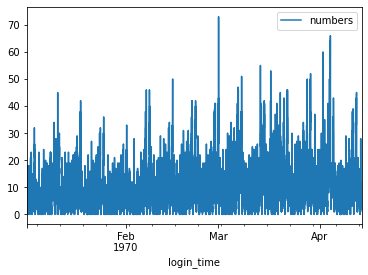

In [12]:
ultimate15min.plot()

Spikes look periodic, like weekend spikes, to me. Let's check that.

In [13]:
ultimatedaily = df.groupby(pd.Grouper(key='login_time',freq='D')).sum()

<AxesSubplot:xlabel='login_time'>

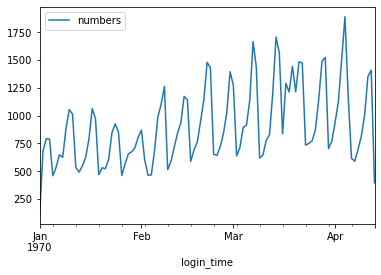

In [14]:
ultimatedaily.plot()

When I agreggate by units of an entire day, one can clearly see a weekly cycle where there are periodic spikes with no huge outliers. Would expect huge spike on St Patrick's day but don't see it.

In [15]:
ultimatedaily.sort_values(by='numbers')

,numbers
login_time,
1970-01-01,112
1970-04-13,395
1970-01-05,459
1970-01-26,462
1970-02-03,464
...,...
1970-03-29,1523
1970-03-15,1565
1970-03-07,1666


Need to figure out if weekdays or weekends

In [16]:
ultimatedaily['day_name']=ultimatedaily.index.weekday

In [17]:
ultimatedaily.sort_values(by='numbers')

,numbers,day_name
login_time,,
1970-01-01,112,3
1970-04-13,395,0
1970-01-05,459,0
1970-01-26,462,0
1970-02-03,464,1
...,...,...
1970-03-29,1523,6
1970-03-15,1565,6
1970-03-07,1666,5


0=Monday, 6=Sunday. As expected, lows are on weekdays and highs are on weekends.

In [18]:
average_day = ultimatedaily.groupby(by='day_name').mean()

In [19]:
average_day

,numbers
day_name,
0,588.200000
1,662.000000
2,738.500000
3,797.333333
4,1013.866667
5,1291.800000
6,1211.133333


In [20]:
average_day['error'] = ultimatedaily.groupby(by='day_name').std()

In [21]:
average_day

,numbers,error
day_name,,
0,588.200000,118.806686
1,662.000000,203.606332
2,738.500000,189.248615
3,797.333333,288.727174
4,1013.866667,218.635661
5,1291.800000,335.041405
6,1211.133333,262.104359


<AxesSubplot:xlabel='day_name'>

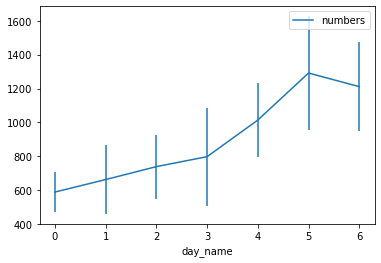

In [22]:
average_day.plot(y='numbers',yerr='error')

Monday =0, Sunday =6. Logins are at their lowest on Monday and climb throughout the week reaching their peek on Saturday and Sunday, with Sunday only slightly less than Saturday. There are over twice as many logins on Saturday than there are on Monday. Now lets look at how logins varry over a single day.

In [23]:
monday = ultimate15min[ultimate15min.index.weekday==0]

In [24]:
monday.head(50)

,numbers
login_time,
1970-01-05 00:00:00,8
1970-01-05 00:15:00,3
1970-01-05 00:30:00,7
1970-01-05 00:45:00,4
1970-01-05 01:00:00,7
1970-01-05 01:15:00,5
1970-01-05 01:30:00,7
1970-01-05 01:45:00,5
1970-01-05 02:00:00,5


In [25]:
monday['time'] = monday.index.time

/var/folders/qc/g6yf7hvd019dnqj11v94qpbw0000gn/T/ipykernel_10934/4152534574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday['time'] = monday.index.time


In [26]:
average_monday= monday.groupby(by='time').mean()

In [27]:
average_monday['std'] = monday.groupby(by='time').std()

In [28]:
average_monday

,numbers,std
time,,
00:00:00,8.400000,4.468940
00:15:00,9.333333,2.943920
00:30:00,9.600000,4.717748
00:45:00,8.066667,3.899939
01:00:00,7.266667,3.104528
...,...,...
22:45:00,10.928571,3.292516
23:00:00,8.214286,2.636389
23:15:00,10.142857,4.276180


<AxesSubplot:xlabel='time'>

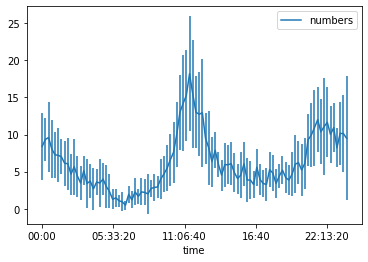

In [29]:
 average_monday.plot(y='numbers', yerr='std')

Two times of day for maximum logins at 11 abd 22. Lunch time and night time.  Let's automate this and do it for all the days of the week.

/var/folders/qc/g6yf7hvd019dnqj11v94qpbw0000gn/T/ipykernel_10934/4093374669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['time'] = day.index.time
/var/folders/qc/g6yf7hvd019dnqj11v94qpbw0000gn/T/ipykernel_10934/4093374669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['time'] = day.index.time
/var/folders/qc/g6yf7hvd019dnqj11v94qpbw0000gn/T/ipykernel_10934/4093374669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

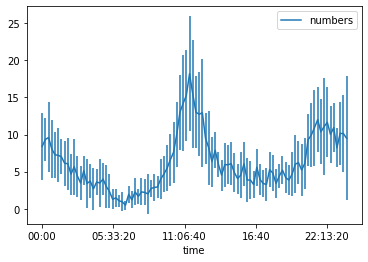

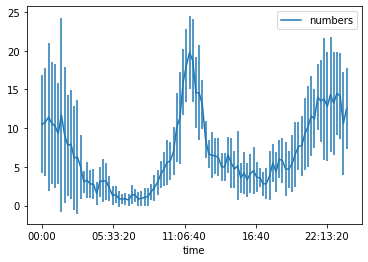

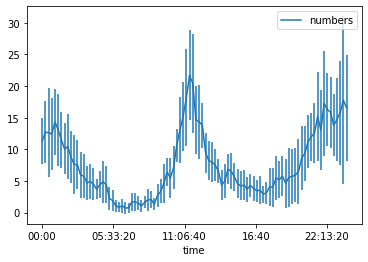

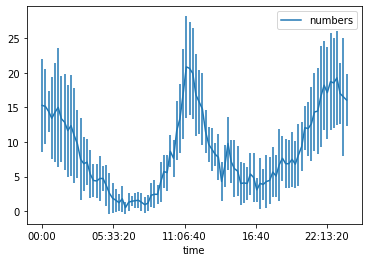

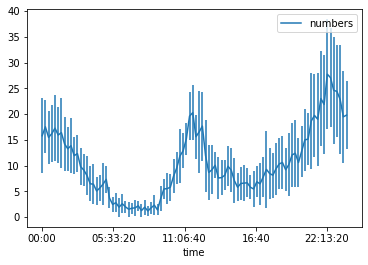

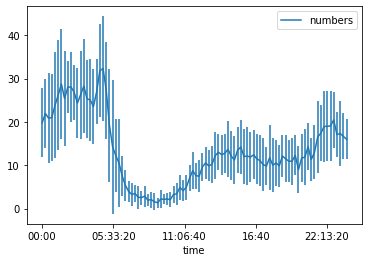

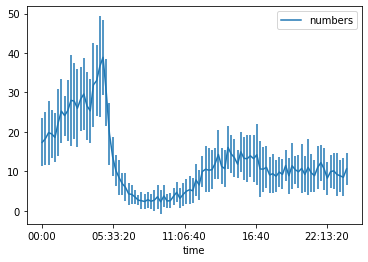

In [30]:
for d in range(7):
    day = ultimate15min[ultimate15min.index.weekday==d]
    day['time'] = day.index.time
    average_day= day.groupby(by='time').mean()
    average_day['std'] = day.groupby(by='time').std()
    average_day.plot(y='numbers', yerr='std')

We see that all weekdays are qualitatively similar to eatchother.  Each has peeks around 11 (lunch time) and 22 (going home from the bar) Saturday and Sunday are similar to eachother but not to weekdays. Saturday and Sunday each start around 15-20 and peak around 5. there is then a steep fall-off growing back to 10 (saleeping off the nagover) or so around 16. Saturday has an additional peak around hour 22 that Sunday doesn't have. 

<AxesSubplot:xlabel='month'>

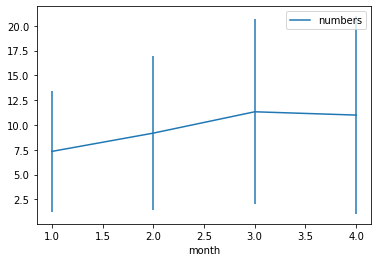

In [31]:
month = ultimate15min.copy()
month['month'] = month.index.month
average_month = month.groupby(by='month').mean()
average_month['std'] = month.groupby(by='month').std()
average_month.plot(y='numbers', yerr='std')

steady increase first three months leveling off in fouth month. Large error bars. Not really useful to compare by month since each month has a different number of weekend days and weekdays. But it could be that people go out more when it is warm.

In [32]:
result=seasonal_decompose(ultimate15min, model='additive', period=672)


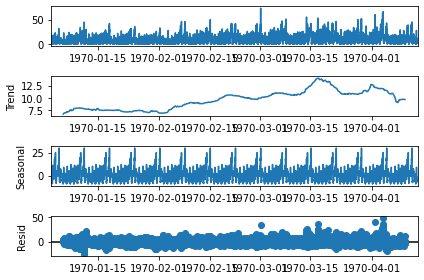

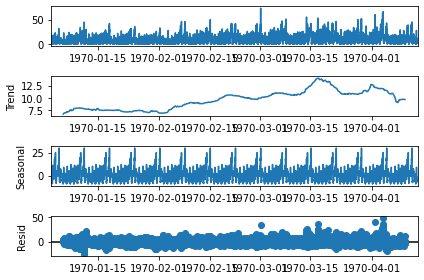

In [33]:
result.plot()

nothing new added from the seasonal decomposition (in this case weekly decomposition. 672 is the number of 15min intervals in a week). Overall trend appers to be low in winter. Higher in spring.

Conclusion: Weekdays are similar to eachother with peaks at lunch time and late night. Weekends look very different with peaks at morning and evening and minimums before noon. Weekend logins are much higher than weekday logins with Saturday doubling Monday's total. More logins in spring months than winter months.

Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the observation
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.

Answer: After ultimate has been in communities for several months so that logins per month are stabilized, and a machine learning model has been developed that makes accurate predications for the upcoming month, provide free tolls to all drivers for one month. Compare metric for the actual month with tolls reimbursed, to predicted month without tolls reimbursed. Two metrics I propose are 1) wait time per user (the length of time that it takes from request until car arrives), and 2) revenue to ultimate - tolls. The first measure is choosen as a metric of improved user experience as a result of the change. The second measure concerns the monetary cost or bennefit to the company.  For metric 1, at the end of the month we will have a distribution of actual wait times with tolls reimbursed and a  predicated distribution of wait times without tolls reimbursed. We can tell if the difference between the two wait times can be accounted for from the distribution without tolls alone by drawing sample distributions from it and calculating the mean and calculating the fraction that are as least as far away from the mean without tolls reimbursed as is the mean with tolls reimbursed. One can also just see how the difference compares to the standard deviation of the distribution wthout tolls reimbursed.

Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYYMMDD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [34]:
part3= pd.read_json('ultimate_data_challenge.json')

In [35]:
part3

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [36]:
part3.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


A couple questionable figures are the maximum distance of 125 trips in 30 days (more than 4 a day) and an average distance of 161 miles. Lets look at some more extremes from those columns.

In [37]:
part3.sort_values(by='trips_in_first_30_days').tail(50)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
22195,Astapor,37,2014-01-10,4.9,1.05,2014-06-29,Android,6.5,False,70.0,2.03,4.6
36930,Astapor,37,2014-01-13,4.9,1.05,2014-06-28,iPhone,8.9,True,70.0,4.97,4.6
44019,King's Landing,37,2014-01-06,4.5,1.00,2014-06-30,iPhone,0.5,True,62.1,5.73,4.5
23689,Astapor,38,2014-01-21,4.8,1.04,2014-06-01,iPhone,6.6,False,71.5,1.22,4.5
32543,Winterfell,38,2014-01-07,4.9,1.05,2014-06-29,iPhone,9.6,False,66.0,2.49,4.6
15042,Astapor,38,2014-01-29,4.8,1.09,2014-06-29,iPhone,13.4,True,76.5,1.76,4.7
34516,King's Landing,38,2014-01-19,4.9,1.03,2014-06-20,iPhone,3.4,False,71.8,5.00,4.9
42768,Winterfell,39,2014-01-22,3.8,1.00,2014-06-30,iPhone,1.2,True,83.5,5.12,4.7
46723,Astapor,39,2014-01-25,4.9,1.12,2014-05-11,iPhone,14.4,True,78.3,2.55,4.8
16268,King's Landing,39,2014-01-26,4.8,1.11,2014-03-24,iPhone,12.7,True,91.1,3.08,4.9


In [38]:
part3.sort_values(by='avg_dist').tail(50)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
30081,Astapor,1,2014-01-11,NaN,1.0,2014-01-12,iPhone,0.0,False,0.0,48.12,5.0
44954,Winterfell,1,2014-01-30,NaN,1.0,2014-01-31,Android,0.0,False,100.0,48.42,5.0
16365,King's Landing,2,2014-01-20,NaN,1.0,2014-06-13,Android,0.0,False,100.0,48.48,5.0
40811,King's Landing,0,2014-01-12,NaN,1.0,2014-05-12,iPhone,0.0,False,100.0,48.53,5.0
6924,Astapor,1,2014-01-13,NaN,1.0,2014-01-20,Android,0.0,True,100.0,48.87,5.0
33521,Astapor,1,2014-01-30,NaN,1.0,2014-01-31,None,0.0,True,100.0,49.17,5.0
35252,Astapor,1,2014-01-28,NaN,1.0,2014-01-30,Android,0.0,True,100.0,49.45,5.0
29060,King's Landing,0,2014-01-19,NaN,1.0,2014-06-17,iPhone,0.0,False,100.0,49.66,5.0
32372,Astapor,1,2014-01-20,NaN,1.0,2014-01-24,iPhone,0.0,False,100.0,49.82,5.0
47128,King's Landing,0,2014-01-29,5.0,1.0,2014-03-28,iPhone,0.0,False,100.0,50.13,5.0


Biggest two 129.89 and 160.96 are way out there. Others are less than 80. Long trips to airports in different cities?

In [39]:
part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


lets connvert the dates to datetime.

In [40]:
part3=part3.astype({'signup_date':'datetime64','last_trip_date':'datetime64'})

In [41]:
part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [42]:
part3.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

note that some last trips run into July. Need to take that into account when making active column.

In [43]:
part3.last_trip_date.min()

Timestamp('2014-01-01 00:00:00')

In [44]:
part3.signup_date.max()

Timestamp('2014-01-31 00:00:00')

In [45]:
part3.signup_date.min()

Timestamp('2014-01-01 00:00:00')

Eventually, will need to deal with null values for avg_rating_of_driver, phone, avg_rating_by_driver.

In [46]:
part3['active'] = (pd.DatetimeIndex(part3['last_trip_date']).month>=6).astype('int')

In [47]:
part3.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

Three cities. Will need to make dumnies column for those. Could also make three seperate models.

In [48]:
part3['doesnt_rate_drivers']= (part3.avg_rating_of_driver.isnull()).astype('int')

created binary feature indicating passengers who never rate drivers

In [49]:
part3[part3.doesnt_rate_drivers==1]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,doesnt_rate_drivers
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0,1
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0,1
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0,0,1
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0,0,1
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0,0,1
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0,0,1
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0,0,1
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0,1


In [50]:
part3[part3.phone.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,doesnt_rate_drivers
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0,1,0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0,0,0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0,0,0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0,1,0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0,0,0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5,0,0
49666,Winterfell,2,2014-01-22,NaN,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0,0,1
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0,0,0


is none a real option? Royalty in Game of Thrones World use their thrones to play games the way we use our phones. So the third option there should really be 'throne'

In [51]:
part3.fillna({'phone':'throne'},inplace=True)

In [52]:
part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

In [53]:
part3['ultb_user']= part3.ultimate_black_user.astype('int')

binary field for ultimate black users. Origonal column will be replaced.

In [54]:
part3['drivers_dont_rate']= (part3.avg_rating_by_driver.isnull()).astype('int')

field for passengers who don't ever get rated by their drivers

In [55]:
y = part3['active']

In [56]:
X = part3.drop(columns=['active','signup_date','last_trip_date','ultimate_black_user'])

In [57]:
X

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,doesnt_rate_drivers,ultb_user,drivers_dont_rate
0,King's Landing,4,4.7,1.10,iPhone,15.4,46.2,3.67,5.0,0,1,0
1,Astapor,0,5.0,1.00,Android,0.0,50.0,8.26,5.0,0,0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,100.0,0.77,5.0,0,0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,80.0,2.36,4.9,0,1,0
4,Winterfell,14,4.4,1.19,Android,11.8,82.4,3.13,4.9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,100.0,5.63,4.2,0,0,0
49996,Astapor,1,NaN,1.00,iPhone,0.0,0.0,0.00,4.0,1,0,0
49997,Winterfell,0,5.0,1.00,Android,0.0,100.0,3.86,5.0,0,1,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,100.0,4.58,3.5,0,0,0


In [58]:
X = pd.get_dummies(X)

In [59]:
X

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,doesnt_rate_drivers,ultb_user,drivers_dont_rate,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_throne
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,0,1,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,0,1,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,100.0,5.63,4.2,0,0,0,0,1,0,0,1,0
49996,1,NaN,1.00,0.0,0.0,0.00,4.0,1,0,0,1,0,0,0,1,0
49997,0,5.0,1.00,0.0,100.0,3.86,5.0,0,1,0,0,0,1,1,0,0
49998,2,3.0,1.00,0.0,100.0,4.58,3.5,0,0,0,1,0,0,0,1,0


city and phone which have three types have been made into dummies. I have not dropped first becuase I will use random forrest.

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    41878 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    49799 non-null  float64
 7   doesnt_rate_drivers     50000 non-null  int64  
 8   ultb_user               50000 non-null  int64  
 9   drivers_dont_rate       50000 non-null  int64  
 10  city_Astapor            50000 non-null  uint8  
 11  city_King's Landing     50000 non-null  uint8  
 12  city_Winterfell         50000 non-null  uint8  
 13  phone_Android           50000 non-null  uint8  
 14  phone_iPhone            50000 non-null

still have to deal with nulls in two columns. Will fill them with median of training set. Let's see if all the other numbers look good.

In [61]:
X.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,doesnt_rate_drivers,ultb_user,drivers_dont_rate,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_throne
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.162440,0.37708,0.004020,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.368858,0.48466,0.063277,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
avg_rating_by_driver_median=X_train.avg_rating_by_driver.median()

In [65]:
avg_rating_of_driver_median = X_train.avg_rating_of_driver.median()

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  40000 non-null  int64  
 1   avg_rating_of_driver    33506 non-null  float64
 2   avg_surge               40000 non-null  float64
 3   surge_pct               40000 non-null  float64
 4   weekday_pct             40000 non-null  float64
 5   avg_dist                40000 non-null  float64
 6   avg_rating_by_driver    39843 non-null  float64
 7   doesnt_rate_drivers     40000 non-null  int64  
 8   ultb_user               40000 non-null  int64  
 9   drivers_dont_rate       40000 non-null  int64  
 10  city_Astapor            40000 non-null  uint8  
 11  city_King's Landing     40000 non-null  uint8  
 12  city_Winterfell         40000 non-null  uint8  
 13  phone_Android           40000 non-null  uint8  
 14  phone_iPhone            40000 non-

In [67]:
X_train.fillna({'avg_rating_of_driver':avg_rating_of_driver_median},inplace=True)

In [68]:
X_train.fillna({'avg_rating_by_driver':avg_rating_by_driver_median},inplace=True)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  40000 non-null  int64  
 1   avg_rating_of_driver    40000 non-null  float64
 2   avg_surge               40000 non-null  float64
 3   surge_pct               40000 non-null  float64
 4   weekday_pct             40000 non-null  float64
 5   avg_dist                40000 non-null  float64
 6   avg_rating_by_driver    40000 non-null  float64
 7   doesnt_rate_drivers     40000 non-null  int64  
 8   ultb_user               40000 non-null  int64  
 9   drivers_dont_rate       40000 non-null  int64  
 10  city_Astapor            40000 non-null  uint8  
 11  city_King's Landing     40000 non-null  uint8  
 12  city_Winterfell         40000 non-null  uint8  
 13  phone_Android           40000 non-null  uint8  
 14  phone_iPhone            40000 non-

In [70]:
X_test.fillna({'avg_rating_of_driver':avg_rating_of_driver_median},inplace=True)
X_test.fillna({'avg_rating_by_driver':avg_rating_by_driver_median},inplace=True)

In [71]:
from sklearn.ensemble import RandomForestClassifier

I choose random forrest becuase it is fast and gives decent results without having to tune. It has built in feature importances. It doesn't require scaling of data.

In [72]:
rfc = RandomForestClassifier()

In [73]:
parameters = {'criterion':('gini', 'entropy'), 'max_features':['sqrt', None]}

In [74]:
gdscv = GridSearchCV(rfc,parameters)

In [75]:
gdscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ['sqrt', None]})

In [76]:
gdscv.best_params_

{'criterion': 'entropy', 'max_features': None}

In [77]:
gdscv.best_score_

0.7632999999999999

In [78]:
gdscv.best_estimator_.score(X_test,y_test)

0.7554

Not very accurate. But not overfit either. 

In [79]:
gdscv.best_estimator_.feature_importances_

array([0.0748586 , 0.07726297, 0.04414385, 0.05652143, 0.11663531,
       0.3290667 , 0.14558449, 0.0139179 , 0.02573126, 0.0008226 ,
       0.01396652, 0.05736392, 0.00975848, 0.02196489, 0.01129505,
       0.00110605])

In [80]:
X_train.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'doesnt_rate_drivers', 'ultb_user', 'drivers_dont_rate', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'phone_throne'],
      dtype='object')

In [81]:
fi = pd.DataFrame(gdscv.best_estimator_.feature_importances_, index= X_train.columns,columns=['importance'])

In [82]:
fi.sort_values(by='importance',ascending=False)

,importance
avg_dist,0.329067
avg_rating_by_driver,0.145584
weekday_pct,0.116635
avg_rating_of_driver,0.077263
trips_in_first_30_days,0.074859
city_King's Landing,0.057364
surge_pct,0.056521
avg_surge,0.044144
ultb_user,0.025731
phone_Android,0.021965


Features most effecting retention are averge distance driven, average rating by drivers, and percentage of rides taken on weekdays. If one could locate a reason for the long distances, such as people living far away from work, this could provide a target to market to new customers. Secondly, people who take rides on weekdays could be targeted through lunch time weekday promotions. Lastly, drivers who are rated highly by drivcers are probably wealthy good tippers so marketing towards the wealthy should be considered, although ultimiate black is not important.